In [119]:
import pandas as pd
import numpy as np

raw_data = pd.read_excel(r'C:\Users\1\Documents\Work\for_feature_analysis.xlsx', encoding = 'utf8')

In [121]:
#names = ['name','bvdep','nace', 'city','revenue_2015','revenue_2014','revenue_2013','pnl_2015', 'pnl_2014','pnl_2013', 'bs_2015', 'bs_2014', 'bs_2013']
fin_data = raw_data.loc[:,['Название компании', 'Номер BvD','Оснвоной код NACE Rev. 2.','Город','Адрес','Дата основания', 'Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2015','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2014','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2013','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2015','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2014','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2013','Баланс\nтыс UAH\n(Rate at last closing date)\n2015','Баланс\nтыс UAH\n(Rate at last closing date)\n2014','Баланс\nтыс UAH\n(Rate at last closing date)\n2013']]
#fin_data = fin_data.rename(index = str, columns = {'Название компании':'name'})
fin_data = fin_data.rename(index = str, columns = {'Название компании':'name','Номер BvD':'bvdep', 'Оснвоной код NACE Rev. 2.':'nace', 'Город':'city', 'Дата основания': 'inc_year','Адрес':'adress', 'Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2015':'revenue_2015','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2014':'revenue_2014', 'Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2013':'revenue_2013', 'Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2015':'pnl_2015','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2014':'pnl_2014','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2013':'pnl_2013','Баланс\nтыс UAH\n(Rate at last closing date)\n2015':'bs_2015','Баланс\nтыс UAH\n(Rate at last closing date)\n2014':'bs_2014','Баланс\nтыс UAH\n(Rate at last closing date)\n2013':'bs_2013'})
#fin_data['Название компании'] = fin_data['Название компании'].reindex('name')
print(fin_data.head(3))

                                                  name       bvdep    nace  \
1.0                                  СКЕЛА ТЕРЦИУМ ТОВ  UA35247177  4690.0   
2.0  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ФАРМПЛ...  UA36852896  4646.0   
3.0                                       ФІТО ЛЕК ТОВ  UA21194014  4646.0   

       city                                             adress  inc_year  \
1.0    Киев        вул. Сергія Струтинського, 13-15, оф. 509/1    2004.0   
2.0    Мила  вул. Комарова 23 Л, Києво-Святошинський р-н, К...    2009.0   
3.0  Харків                              вул. Катерининська 46    1993.0   

    revenue_2015 revenue_2014 revenue_2013 pnl_2015 pnl_2014 pnl_2013 bs_2015  \
1.0      3658385       495869            0     2415     8793        0  836033   
2.0      2472890      1274936       526223     4149   -34297     3438  627628   
3.0      1339189       801487       437821    22540    20140    16369  264604   

    bs_2014 bs_2013  
1.0  439163  116650  
2.0  477602  

In [122]:
import re

def drop_missing_data(x):
    empty_list = []
    if re.findall(r'n.a.', str(x)) == empty_list:
        return str(x)
    else:
        return np.nan

fin_names = list(fin_data.columns)[4:]
for col_name in fin_names:
    fin_data[col_name] = fin_data[col_name].apply(lambda x: drop_missing_data(x))
    fin_data = fin_data[fin_data[col_name]!='0']
fin_data = fin_data.dropna()
#print(fin_data)

In [123]:
years = ['2015', '2014','2013']
for year in years:
    fin_data['pnl_'+year] = fin_data['pnl_'+year].apply(lambda x: float(x))
    fin_data['revenue_'+year] = fin_data['revenue_'+year].apply(lambda x: float(x))
    fin_data['bs_'+year] = fin_data['bs_'+year].apply(lambda x: float(x))        

fin_data['rev_ave'] = (fin_data['revenue_2015']+fin_data['revenue_2014']+fin_data['revenue_2013'])/3
fin_data['pnl_ave'] = (fin_data['pnl_2015']+fin_data['pnl_2014']+fin_data['pnl_2013'])/3
fin_data['bs_ave'] = (fin_data['bs_2015']+fin_data['bs_2014']+fin_data['bs_2013'])/3

print(fin_data.head(5))

                                                  name       bvdep    nace  \
2.0  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ФАРМПЛ...  UA36852896  4646.0   
3.0                                       ФІТО ЛЕК ТОВ  UA21194014  4646.0   
4.0                                         ВІКАНТ ТОВ  UA32633572  4690.0   
6.0  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ГАЛАФА...  UA30886474  4646.0   
7.0               ОЛДІ ТОРГОВЕЛЬНО БУДІВЕЛЬНИЙ ДІМ ТОВ  UA24738845  4673.0   

           city                                             adress inc_year  \
2.0        Мила  вул. Комарова 23 Л, Києво-Святошинський р-н, К...   2009.0   
3.0      Харків                              вул. Катерининська 46   1993.0   
4.0  Кривий Ріг       Дніпропетровська обл., вул. Іллічівська, 5 а   2001.0   
6.0        Киев                              вул. Магнітогорська 1   2000.0   
7.0        Киев                                    вул. Гарматна 7   1997.0   

     revenue_2015  revenue_2014  revenue_2013  pnl_2015 

In [124]:
fin_data['quantity'] = 1
fin_data['rev_ave_2'] = fin_data['rev_ave'].apply(lambda x: np.around(x, decimals = -3))
fin_data['opm'] = fin_data['pnl_ave']/fin_data['rev_ave']*100
fin_data['opm'] = fin_data['opm'].apply(lambda x: np.around(x, decimals = 2))

#print(fin_data.head(5))    
print(fin_data.describe())

               nace  revenue_2015  revenue_2014  revenue_2013       pnl_2015  \
count  13494.000000  1.349400e+04  1.349400e+04  1.349400e+04   13494.000000   
mean    4679.132059  1.007964e+04  7.925524e+03  7.152477e+03     228.604239   
std       15.507982  4.950606e+04  3.659307e+04  3.000444e+04    6927.195900   
min     4646.000000 -2.340000e+02 -4.489000e+02 -1.728700e+04 -248260.900000   
25%     4673.000000  3.714750e+02  3.689500e+02  3.985750e+02       1.100000   
50%     4690.000000  1.702350e+03  1.446450e+03  1.444950e+03      41.700000   
75%     4690.000000  6.610525e+03  5.182600e+03  4.814950e+03     278.600000   
max     4690.000000  2.761428e+06  2.148031e+06  1.843405e+06  552526.900000   

            pnl_2014      pnl_2013       bs_2015       bs_2014       bs_2013  \
count   13494.000000  13494.000000  1.349400e+04  1.349400e+04  1.349400e+04   
mean      -68.072536    159.040796  5.929853e+03  4.670915e+03  3.908200e+03   
std      6558.927860   1741.165599  5.0

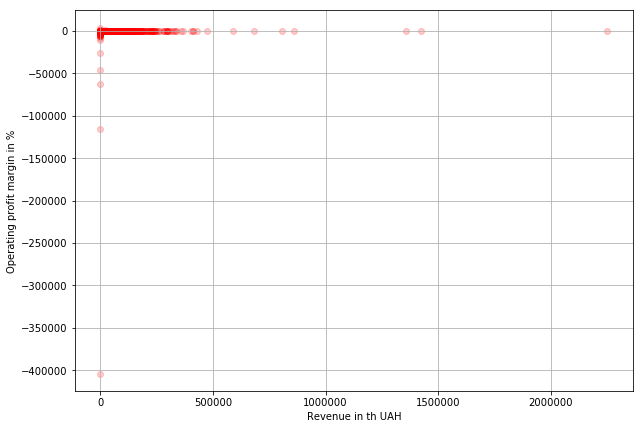

In [406]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(fin_data['rev_ave'], fin_data['opm'], c = 'r', alpha=0.2)
plt.xlabel('Revenue in th UAH')
plt.ylabel('Operating profit margin in %')
plt.grid()
plt.show()

Analysis of operating profit margin dependecies from company's revenue.

companies with average operating margin less than -20.0 were descluded

In [125]:
fd = fin_data.loc[:,['rev_ave_2','rev_ave', 'pnl_ave','opm','quantity']]
fd['rev_ave_2'] = fd['rev_ave_2']/1000
fd = fd[fd['rev_ave']>0]
fd = fd[fd['opm']>-20.0]

fd = fd.groupby(['rev_ave_2'], as_index = False).agg({'quantity' : np.sum,'opm' : np.median})

print(fd.describe())
print(fd.head(5))

         rev_ave_2         opm     quantity
count   210.000000  210.000000   210.000000
mean    158.014286    2.556357    59.909524
std     228.512885    3.881696   301.240889
min       0.000000  -18.180000     1.000000
25%      52.250000    1.195000     1.000000
50%     106.500000    2.550000     2.000000
75%     183.750000    3.517500     8.750000
max    2251.000000   19.940000  2788.000000
   rev_ave_2   opm  quantity
0        0.0  2.24      2788
1        1.0  2.76      2739
2        2.0  2.95      1520
3        3.0  3.05       919
4        4.0  3.40       683


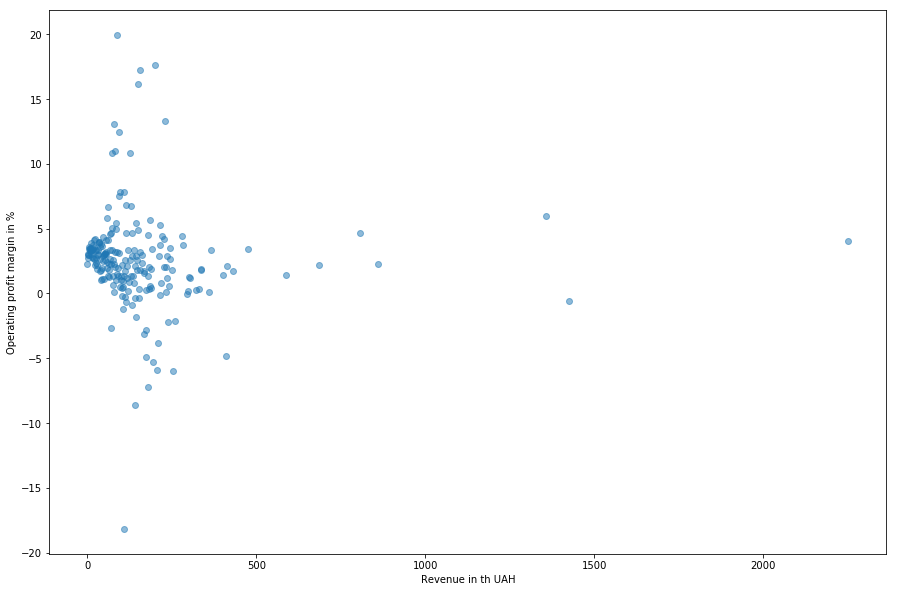

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.scatter(fd['rev_ave_2'], fd['opm'], alpha=0.5)
plt.xlabel('Revenue in th UAH')
plt.ylabel('Operating profit margin in %')
plt.show()

In [127]:
#descluded critial figures
#fd = fd[fd['rev_ave_2']>1.0]
fd = fd[fd['rev_ave_2']<1000.0]
#fd = fd[fd['opm']>-5.0]
#fd = fd[fd['opm']<15.0]
print(fd.describe())

        rev_ave_2         opm     quantity
count  207.000000  207.000000   207.000000
mean   135.995169    2.547995    60.763285
std    128.324093    3.895010   303.341963
min      0.000000  -18.180000     1.000000
25%     51.500000    1.200000     1.000000
50%    105.000000    2.540000     2.000000
75%    180.500000    3.455000     9.000000
max    859.000000   19.940000  2788.000000


In [128]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

rev_train = fd.loc[:,['rev_ave_2']]
opm_train = fd.loc[:,['opm']]
rev_test = fd.loc[:,['rev_ave_2']]

lr.fit(rev_train, opm_train)
pred = lr.predict(rev_test)
#print(pred)

We can check comparability of outliers first and only after that define the most relevant threshold that may be applied to the data

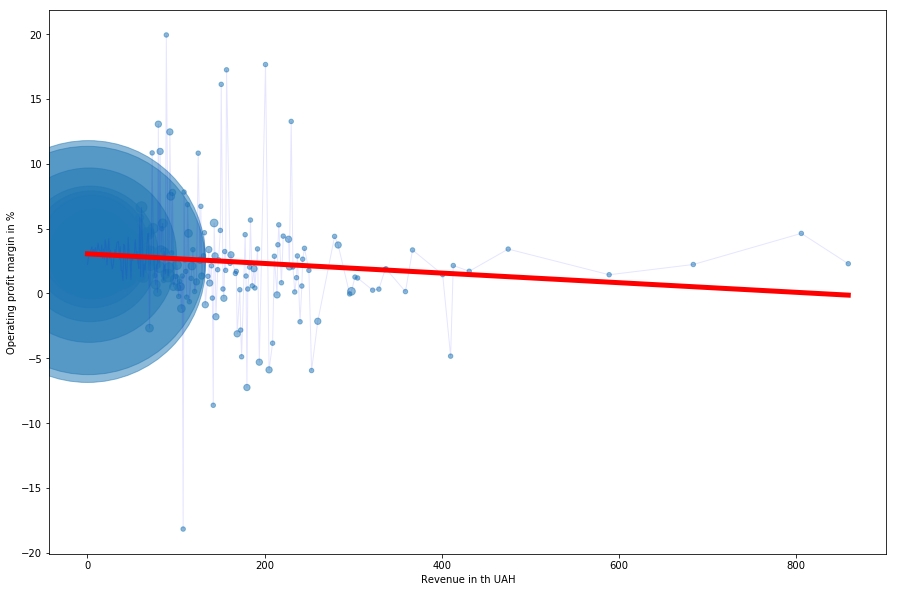

In [129]:
a

Analysis of margin dependencies from city

In [130]:
fd_city = fin_data.loc[:,['city','opm','quantity']]

def rename_city(df):
    df.city[df['city']=='Дніпро (Дніпропетровськ)']='Дніпро'
    df.city[df['city']=='Дніпропетровськ']='Дніпро'
    df.city[df['city']=='Камьянське (Дніпродзержинськ)'] = 'Камьянське'
    df.city[df['city']=='Дніпродзержинськ'] = 'Камьянське'
    df.city[df['city']=='Кропивницький (Кіровоград)'] = 'Кропивницький'
    df.city[df['city']=='Кіровоград'] = 'Кропивницький'
    
    return df

fd_city = rename_city(fd_city)
fd_city = fd_city[fd_city['opm']>-20.0]
fd_city = fd_city[fd_city['opm']<100.0]
#print(fd_city.describe())

C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [131]:
fd_city['city'] = fd_city['city'].apply(lambda x: x.lower())
fd_city = fd_city.groupby(['city'], as_index = False).agg({'quantity' : np.sum,'opm' : np.median})
print(fd_city.describe())
print(fd_city.head(3))

              opm     quantity
count  826.000000   826.000000
mean     4.579485    15.198547
std      8.468814   141.623622
min    -19.750000     1.000000
25%      1.107500     1.000000
50%      3.450000     1.000000
75%      6.710000     2.000000
max     99.400000  3583.000000
               city    opm  quantity
0    iвано-франкове  0.700         2
1  iвано-франківськ  1.225         4
2            iрпінь  5.730         6


In [132]:
fd_city.city[fd_city['quantity']<15]='other'
fd_city = fd_city.groupby(['city'], as_index = False).agg({'quantity' : np.sum,'opm' : np.median})
fd_city = fd_city.sort_values(by = 'quantity', ascending = True)
fd_city['city_id'] = np.arange(1,len(fd_city.index)+1)
fd_city.city_id[fd_city['city'] == 'other'] = 0 
print(fd_city.describe())
print(fd_city.tail(5))

             opm     quantity    city_id
count  56.000000    56.000000  56.000000
mean    3.093304   224.178571  27.517857
std     1.231285   544.151754  16.340681
min     1.180000    15.000000   0.000000
25%     2.257500    19.500000  13.750000
50%     2.927500    53.000000  27.500000
75%     3.697500   165.750000  41.250000
max     6.740000  3583.000000  56.000000
      city    opm  quantity  city_id
28   львів  3.840       502       52
48  харків  2.800      1101       53
10  дніпро  3.745      1222       54
0    other  3.640      1539        0
19    киев  2.290      3583       56


C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [133]:
annotations = fd_city['city'].values
x = fd_city['city_id'].values
y = fd_city['opm'].values

print(annotations)
#print(x, y)

['камьянець-подільський' 'бердянськ' 'боярка' 'обухів' 'дружківка'
 'сєвєродонецьк' 'умань' 'дрогобич' 'мелітополь' 'вишгород' 'васильків'
 'слобожанське (ювілейне)' 'калуш' 'конотоп' 'мукачево' 'бориспіль'
 'сєверодонецьк' 'червоноград' 'словьянськ' 'луганськ' 'новомосковськ'
 'нікополь' 'костянтинівка' 'павлоград' 'камьянське' 'біла церква'
 'вишневе' 'бровари' 'краматорськ' 'кропивницький' 'тернопіль' 'ужгород'
 'маріуполь' 'кременчук' 'чернівці' 'хмельницький' 'чернігів' 'луцьк'
 'рівне' 'житомир' 'івано-франківськ' 'черкаси' 'вінниця' 'донецьк'
 'херсон' 'суми' 'миколаїв' 'полтава' 'кривий ріг' 'запоріжжя' 'одеса'
 'львів' 'харків' 'дніпро' 'other' 'киев']


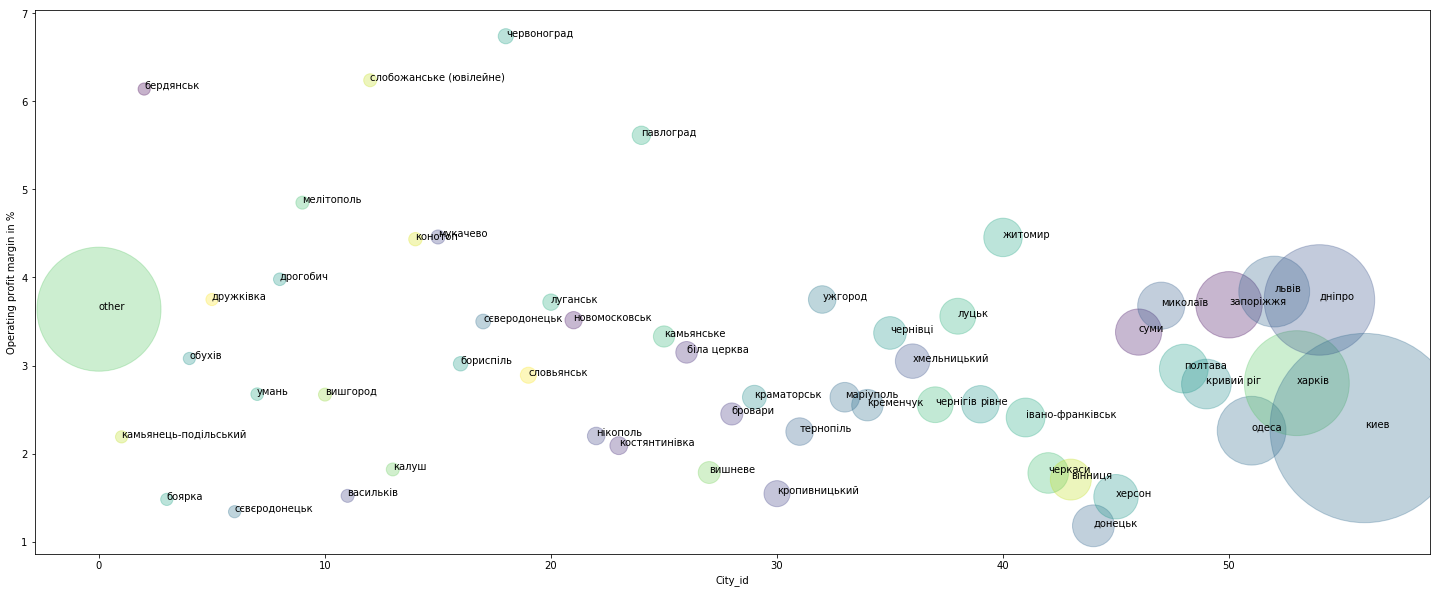

In [135]:
plt.figure(figsize=(25,10))
colors = np.random.rand(len(fd_city.index))
plt.scatter(fd_city['city_id'], fd_city['opm'], s=fd_city['quantity']*10, c=colors, alpha=0.3)
#plt.bar(fd_city['city_id'], fd_city['opm'])
plt.xlabel('City_id')
plt.ylabel('Operating profit margin in %')
for i in range(len(annotations)):
    plt.annotate(annotations[i], (x[i], y[i]))
#plt.annotate(xy = (fd_city['city_id'], fd_city['opm']), s = fd_city['city'])
#plt.legend(handles=[list(fd_city['city'].values())], loc=1)
plt.show()

In [141]:
fin_data.loc[:,['city','adress']] = fin_data.loc[:,['city', 'adress']].fillna(value = 'missing')
fin_data.adress = fin_data.adress.apply(lambda x: x.lower())

print(fin_data.adress.describe())
print(fin_data.adress.head(10))

count                                            13494
unique                                           12518
top       вул. мельникова, буд. 12, шевченківський р-н
freq                                                22
Name: adress, dtype: object
2.0     вул. комарова 23 л, києво-святошинський р-н, к...
3.0                                 вул. катерининська 46
4.0          дніпропетровська обл., вул. іллічівська, 5 а
6.0                                 вул. магнітогорська 1
7.0                                       вул. гарматна 7
8.0     вул. ворошилова 12 а, бородянський р-н, київсь...
9.0        вул. героїв сталінграду, 122, корп. е-5, оф. 4
10.0                 вул. солов'яненка 115, донецька обл.
13.0    вул. драгоманова, буд. 44-а, оф. 63, дарницьки...
15.0                                    пров. радищева, 3
Name: adress, dtype: object


In [142]:
import re

def get_region(x):
    x = str(x)
    temp = re.findall(r',\s(\S+)\sобл.', x)
    try: return temp[0]
    except IndexError: return np.nan
    
fd_reg_full = rename_city(fin_data)
fd_reg_full.city = [x.lower() for x in fd_reg_full.city]
fd_reg_full['region'] = fd_reg_full['adress'].apply(lambda x: get_region(x))
print(fd_reg_full.head(10))

C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

                                                   name       bvdep    nace  \
2.0   ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ФАРМПЛ...  UA36852896  4646.0   
3.0                                        ФІТО ЛЕК ТОВ  UA21194014  4646.0   
4.0                                          ВІКАНТ ТОВ  UA32633572  4690.0   
6.0   ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ГАЛАФА...  UA30886474  4646.0   
7.0                ОЛДІ ТОРГОВЕЛЬНО БУДІВЕЛЬНИЙ ДІМ ТОВ  UA24738845  4673.0   
8.0                                  ЮНАЙТЕД ФОРЕСТ ТОВ  UA22902499  4649.0   
9.0                                           СТАЛЬ ТОВ  UA35394737  4690.0   
10.0                                ДОНВУГЛЕРЕСУРСИ ТОВ  UA25121804  4690.0   
13.0                                   СКАЙ ПОЛІМЕР ТОВ  UA38656857  4690.0   
15.0                                           ЛІКОМ ПП  UA30638249  4690.0   

                    city                                             adress  \
2.0                 мила  вул. комарова 23 л, києво

C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [143]:
regions =  pd.DataFrame({'reg_name': ['вінницька', 'волинська', 'дніпропетровська', 'донецька', 'житомирська', 'закарпатська', 'запорізька', 'івано-франківська', 'київська', 'кіровоградська','луганська', 'львівська', 'миколаївька', 'одеська', 'полтавська', 'рівенська', 'сумська', 'тернопільська', 'харківська', 'херсонська', 'хмельницька', 'черкаська', 'чернігівська', 'чернівецька'], 
                        'city': ['вінниця', 'луцьк', 'дніпро', 'донецьк', 'житомир', 'ужгород', 'запоріжжя', 'івано-франківськ', 'киев', 'кропивницький', 'луганськ', 'львів', 'миколаїв', 'одеса', 'полтава', 'рівне', 'суми', 'тернопіль', 'харків', 'херсон', 'хмельницький', 'черкаси', 'чернігів', 'чернівці']})
regions_ll = pd.DataFrame({'region': ['вінницька', 'волинська', 'дніпропетровська', 'донецька', 'житомирська', 'закарпатська', 'запорізька', 'івано-франківська', 'київська', 'кіровоградська','луганська', 'львівська', 'миколаївька', 'одеська', 'полтавська', 'рівенська', 'сумська', 'тернопільська', 'харківська', 'херсонська', 'хмельницька', 'черкаська', 'чернігівська', 'чернівецька'], 
                        'city': ['вінниця', 'луцьк', 'дніпро', 'донецьк', 'житомир', 'ужгород', 'запоріжжя', 'івано-франківськ', 'киев', 'кропивницький', 'луганськ', 'львів', 'миколаїв', 'одеса', 'полтава', 'рівне', 'суми', 'тернопіль', 'харків', 'херсон', 'хмельницький', 'черкаси', 'чернігів', 'чернівці'],
                       'latitude':[49.14,    50.45,   48.28,    48.00,     50.15,     48.37,      47.50,          48.55,          50.27,    48.30,           48.35,    49.50,    46.58,      46.29,    49.34,    50.37, 50.54,    49.34,      50.00,    46.38,     49.25,          49.26,     51.30, 48.17],
                       'longtitude':[28.28,  25.19,   35.01,    37.48,     28.39,     22.37,      35.08,          24.42,          30.31,    32.16,           39.20,    24.00,    32.00,      30.43,    34.34,    26.15, 34.48,    26.36,      36.13,    32.36,     27.00,          32.03,     31.18, 25.56]})
print(regions)

                city           reg_name
0            вінниця          вінницька
1              луцьк          волинська
2             дніпро   дніпропетровська
3            донецьк           донецька
4            житомир        житомирська
5            ужгород       закарпатська
6          запоріжжя         запорізька
7   івано-франківськ  івано-франківська
8               киев           київська
9      кропивницький     кіровоградська
10          луганськ          луганська
11             львів          львівська
12          миколаїв        миколаївька
13             одеса            одеська
14           полтава         полтавська
15             рівне          рівенська
16              суми            сумська
17         тернопіль      тернопільська
18            харків         харківська
19            херсон         херсонська
20      хмельницький        хмельницька
21           черкаси          черкаська
22          чернігів       чернігівська
23          чернівці        чернівецька


In [144]:
fd_reg_full = pd.merge(fd_reg_full, regions, how ='left', on = 'city')
print(fd_reg_full.head(5))

                                                name       bvdep    nace  \
0  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ФАРМПЛ...  UA36852896  4646.0   
1                                       ФІТО ЛЕК ТОВ  UA21194014  4646.0   
2                                         ВІКАНТ ТОВ  UA32633572  4690.0   
3  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ГАЛАФА...  UA30886474  4646.0   
4               ОЛДІ ТОРГОВЕЛЬНО БУДІВЕЛЬНИЙ ДІМ ТОВ  UA24738845  4673.0   

         city                                             adress inc_year  \
0        мила  вул. комарова 23 л, києво-святошинський р-н, к...   2009.0   
1      харків                              вул. катерининська 46   1993.0   
2  кривий ріг       дніпропетровська обл., вул. іллічівська, 5 а   2001.0   
3        киев                              вул. магнітогорська 1   2000.0   
4        киев                                    вул. гарматна 7   1997.0   

   revenue_2015  revenue_2014  revenue_2013  pnl_2015     ...       bs_2014  \
0

In [145]:
fd_reg_full.loc[:,['region', 'reg_name']] = fd_reg_full.loc[:,['region', 'reg_name']].fillna(method = 'bfill', axis = 1)
#fd_reg_full = fd_reg.drop(labels = ['reg_name', 'name', 'adress'], axis=1)
fd_reg_full = pd.merge(fd_reg_full, regions_ll, how ='left', on = 'region')
print(fd_reg_full.head(5))
print(fd_reg_full.loc[:,['revenue_2015', 'revenue_2014', 'revenue_2013', 'pnl_2015', 'pnl_2014', 'pnl_2013', 'opm']].describe())
print(fd_reg_full.columns)

                                                name       bvdep    nace  \
0  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ФАРМПЛ...  UA36852896  4646.0   
1                                       ФІТО ЛЕК ТОВ  UA21194014  4646.0   
2                                         ВІКАНТ ТОВ  UA32633572  4690.0   
3  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ГАЛАФА...  UA30886474  4646.0   
4               ОЛДІ ТОРГОВЕЛЬНО БУДІВЕЛЬНИЙ ДІМ ТОВ  UA24738845  4673.0   

       city_x                                             adress inc_year  \
0        мила  вул. комарова 23 л, києво-святошинський р-н, к...   2009.0   
1      харків                              вул. катерининська 46   1993.0   
2  кривий ріг       дніпропетровська обл., вул. іллічівська, 5 а   2001.0   
3        киев                              вул. магнітогорська 1   2000.0   
4        киев                                    вул. гарматна 7   1997.0   

   revenue_2015  revenue_2014  revenue_2013  pnl_2015     ...      \
0     24728

In [146]:
fd_reg_full = fd_reg_full[fd_reg_full['rev_ave_2']>0]
fd_reg_full = fd_reg_full[fd_reg_full['opm']>-20.0]

In [147]:
fd_reg = fd_reg_full.loc[:,['region','latitude', 'longtitude','opm','quantity']]
fd_reg = fd_reg.groupby(['region'], as_index = False).agg({'quantity' : np.sum,'opm' : np.mean, 'latitude': np.median, 'longtitude': np.median})
fd_reg = fd_reg.sort_values(by = 'quantity', ascending = False)
fd_reg = fd_reg.dropna() #will cut about 30-40 entities that had problems with region data scraping
print(fd_reg)

               region  latitude       opm  longtitude  quantity
13           київська     50.27  4.204278       30.31      3179
6    дніпропетровська     48.28  4.650267       35.01      1236
26         харківська     50.00  4.645487       36.13       966
17          львівська     49.50  5.619173       24.00       508
20            одеська     46.29  3.566117       30.43       461
12         запорізька     47.50  5.074393       35.08       346
8            донецька     48.00  7.508076       37.48       317
21         полтавська     49.34  4.107345       34.34       226
24            сумська     50.54  5.095082       34.48       183
28         херсонська     46.38  4.091491       32.36       161
33  івано-франківська     48.55  4.096067       24.42       150
9         житомирська     50.15  6.626959       28.39       148
30          черкаська     49.26  4.046438       32.03       146
4           вінницька     49.14  3.627847       28.28       144
2           волинська     50.45  5.15451

In [148]:
fd_reg['opm'] = fd_reg['opm'].apply(lambda x: np.around(x, decimals = 2))
annotations_reg = fd_reg['region'].values
annotations_opm = fd_reg['opm'].values
x_reg = fd_reg['longtitude'].values
y_reg = fd_reg['latitude'].values

#print(annotations)
#print(x, y)

loading C:\Users\1\Pictures\Saved Pictures\Blank_map_of_Ukraine.png


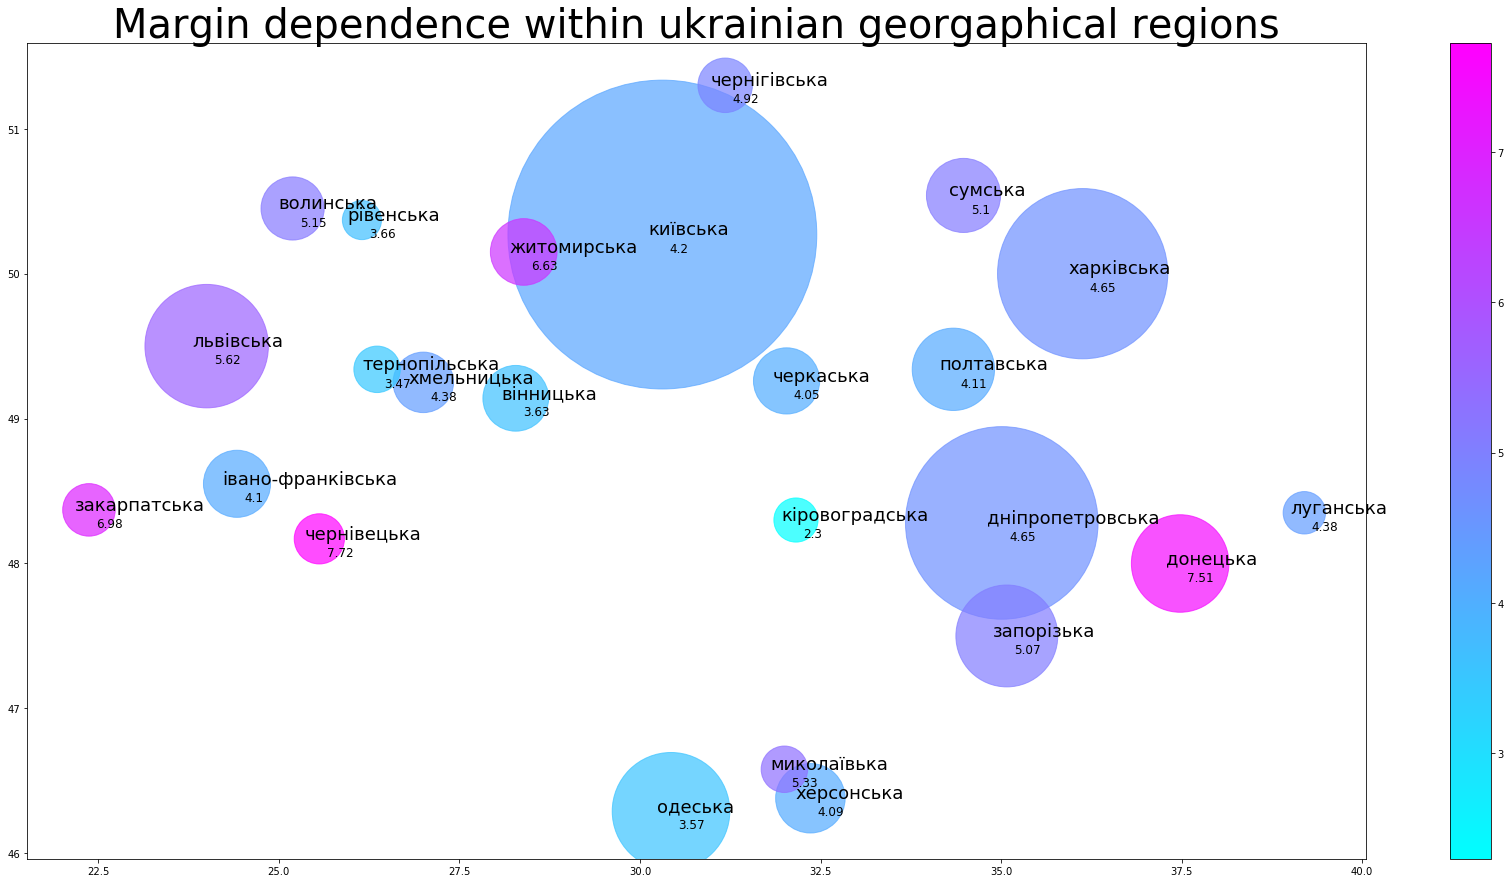

In [400]:
import matplotlib.colors
import matplotlib.cbook as cbook
import matplotlib.image as image

datafile = cbook.get_sample_data(r'C:\Users\1\Pictures\Saved Pictures\Blank_map_of_Ukraine.png', asfileobj=False)
print('loading %s' % datafile)
im = image.imread(datafile)

im[:, :, -1] = 0.3  # set the alpha channel

fig, ax = plt.subplots(figsize=(30,15))
#plt.figure(figsize=(30,15))
cmap = plt.cm.cool
norm = mpl.colors.Normalize(vmin = fd_reg['opm'].min(), vmax = fd_reg['opm'].max())

ax.scatter(fd_reg['longtitude'], fd_reg['latitude'], s=fd_reg['quantity']*30, c =cmap(norm(fd_reg.opm)), alpha = 0.7)
ax.set_title('Margin dependence within ukrainian georgaphical regions')
#plt.imshow(fd_reg['opm'], cmap = cm.afmhot)
#cmap = mpl.cm.cool
#norm = mpl.colors.Normalize(vmin = fd_reg['opm'].min(), vmax = fd_reg['opm'].max())
#plt.set_title('Operation margin distribution within ukrainian geographical regions')
sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
sm.set_array([])
fig.colorbar(sm)
#fig.figimage(im, 10, 10, zorder=3)


for i in range(len(annotations_reg)):
    ax.annotate(annotations_reg[i], (x_reg[i]-0.2, y_reg[i]), fontsize = 18)   
    ax.annotate(annotations_opm[i], (x_reg[i]+0.1, y_reg[i]-0.12), fontsize = 12)
#plt.annotate(xy = (fd_city['city_id'], fd_city['opm']), s = fd_city['city'])
#plt.legend(handles=[list(fd_city['city'].values())], loc=1)
#ax = plt.subplot(111, xlabel='x', ylabel='y', title='title')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(40)
plt.show()

In [365]:
print(fin_data.head(5))
print(fin_data.columns)

                                                  name       bvdep    nace  \
2.0  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ФАРМПЛ...  UA36852896  4646.0   
3.0                                       ФІТО ЛЕК ТОВ  UA21194014  4646.0   
4.0                                         ВІКАНТ ТОВ  UA32633572  4690.0   
6.0  ТОВАРИСТВО З ОБМЕЖЕНОЮ В ДПОВ ДАЛЬН СТЮ ГАЛАФА...  UA30886474  4646.0   
7.0               ОЛДІ ТОРГОВЕЛЬНО БУДІВЕЛЬНИЙ ДІМ ТОВ  UA24738845  4673.0   

           city                                             adress inc_year  \
2.0        мила  вул. комарова 23 л, києво-святошинський р-н, к...   2009.0   
3.0      харків                              вул. катерининська 46   1993.0   
4.0  кривий ріг       дніпропетровська обл., вул. іллічівська, 5 а   2001.0   
6.0        киев                              вул. магнітогорська 1   2000.0   
7.0        киев                                    вул. гарматна 7   1997.0   

     revenue_2015  revenue_2014  revenue_2013  pnl_2015 

In [372]:
fd_year = fin_data.loc[:,['inc_year', 'opm', 'rev_ave_2', 'quantity']]
fd_year['curr'] = 2015
fd_year['no_y_from_inc'] = fd_year['inc_year'].apply(lambda x: 2015- float(x))
#fd_year = fd_year[fd_year['rev_ave_2']>0]
fd_year = fd_year[fd_year['opm']>-50]

print(fd_year.head(5))
print(fd_year.describe())

    inc_year   opm  rev_ave_2  quantity  curr  no_y_from_inc
2.0   2009.0 -0.62  1425000.0         1  2015            6.0
3.0   1993.0  2.29   859000.0         1  2015           22.0
4.0   2001.0  1.44   589000.0         1  2015           14.0
6.0   2000.0  2.23   684000.0         1  2015           15.0
7.0   1997.0  4.63   806000.0         1  2015           18.0
                opm     rev_ave_2  quantity     curr  no_y_from_inc
count  13061.000000  1.306100e+04   13061.0  13061.0   10751.000000
mean       3.968868  8.525304e+03       1.0   2015.0      11.929402
std       43.250956  3.744047e+04       0.0      0.0       4.768340
min      -49.980000  0.000000e+00       1.0   2015.0       2.000000
25%        0.110000  1.000000e+03       1.0   2015.0       9.000000
50%        2.690000  2.000000e+03       1.0   2015.0      12.000000
75%        6.390000  6.000000e+03       1.0   2015.0      16.000000
max     4060.140000  2.251000e+06       1.0   2015.0      26.000000


In [373]:
fd_year['inc_year'] = fd_year['inc_year'].apply(lambda x: float(x))
fd_year['inc_year'] = fd_year['inc_year'].apply(lambda x: np.around(x, decimals = 0))
fd_year_g = fd_year.groupby(['no_y_from_inc'], as_index = False).agg({'quantity' : np.sum,'opm' : np.mean, 'inc_year': np.median})
#fd_year_g = fd_year_g[fd_year_g['opm']>0]
print(fd_year_g.describe())

       no_y_from_inc     inc_year        opm     quantity
count      25.000000    25.000000  25.000000    25.000000
mean       14.000000  2001.000000   4.043234   430.040000
std         7.359801     7.359801   2.240624   348.834904
min         2.000000  1989.000000  -0.095000     1.000000
25%         8.000000  1995.000000   3.248205    74.000000
50%        14.000000  2001.000000   3.551878   366.000000
75%        20.000000  2007.000000   3.976356   687.000000
max        26.000000  2013.000000  10.527249  1141.000000


In [374]:
lr_y = linear_model.LinearRegression()

year_train = fd_year_g.loc[:,['no_y_from_inc']]
opm_train = fd_year_g.loc[:,['opm']]
year_test = fd_year_g.loc[:,['no_y_from_inc']]

lr_y.fit(year_train, opm_train)
pred = lr_y.predict(year_test)

In [375]:
fd_year_g['inc_year'] = fd_year_g['inc_year'].apply(lambda x: str(x)[:-2])
fd_year_g['opm'] = fd_year_g['opm'].apply(lambda x: np.around(x, decimals = 2))
annotations_year = fd_year_g['inc_year'].values
annotations_opm_year = fd_year_g['opm'].values
x_year = fd_year_g['no_y_from_inc'].values
y_year = fd_year_g['opm'].values

startups = fd_year_g.loc[:3,['no_y_from_inc']].values
startups_opm = fd_year_g.loc[:3,['opm']].values

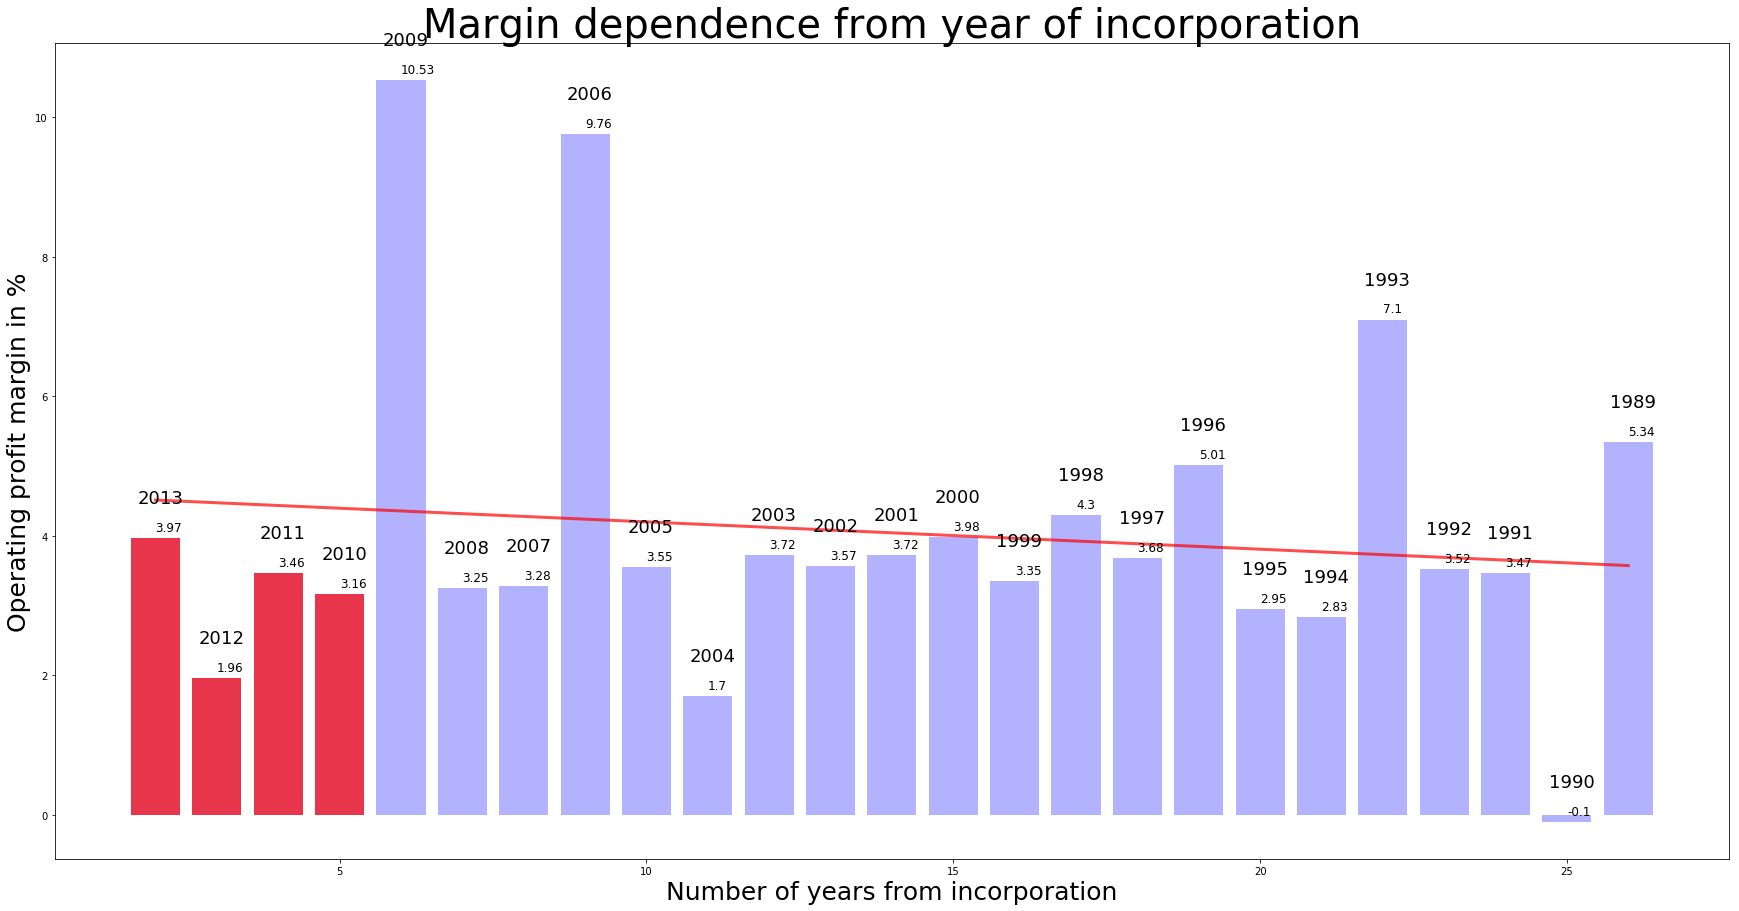

In [376]:
fig, ax = plt.subplots(figsize=(30,15))
#plt.figure(figsize=(25,10))
colors = np.random.rand(len(fd_year_g.index))
ax.bar(fd_year_g['no_y_from_inc'], fd_year_g['opm'], color='b', alpha=0.3)
ax.bar(startups, startups_opm, color='r', alpha=0.7)
ax.plot(year_test, pred, color='r', linewidth=3, alpha=0.7)
ax.set_xlabel('Number of years from incorporation')
ax.set_ylabel('Operating profit margin in %')
ax.set_title('Margin dependence from year of incorporation')
ax.title.set_fontsize(40)
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(25)
for i in range(len(annotations_year)):
    ax.annotate(annotations_year[i], (x_year[i]-0.3, y_year[i]+0.5), fontsize = 18)   
    ax.annotate(annotations_opm_year[i], (x_year[i], y_year[i]+0.1), fontsize = 12)

plt.show()

In [421]:
fd_bs = fin_data.loc[:,['bs_ave', 'opm', 'rev_ave_2', 'quantity']]
fd_bs = fd_bs[fd_bs['opm']>-20]
print(fd_bs.describe())

             bs_ave           opm     rev_ave_2  quantity
count  1.258200e+04  12582.000000  1.258200e+04   12582.0
mean   4.239540e+03      5.332749  8.622000e+03       1.0
std    1.967286e+04     43.456623  3.786296e+04       0.0
min    3.333333e-01    -19.960000  0.000000e+00       1.0
25%    2.179083e+02      0.370000  1.000000e+03       1.0
50%    8.145000e+02      2.900000  2.000000e+03       1.0
75%    2.769650e+03      6.590000  6.000000e+03       1.0
max    1.184176e+06   4060.140000  2.251000e+06       1.0


In [422]:
fd_bs_g = fd_bs
fd_bs_g.bs_ave = fd_bs_g.bs_ave.apply(lambda x: np.around(x, decimals = -3))/1000
fd_bs_g = fd_bs_g.groupby(['bs_ave'], as_index = False).agg({'opm': np.median, 'quantity': np.sum, 'rev_ave_2':np.median})
fd_bs_g = fd_bs_g[fd_bs_g['opm']<100]
fd_bs_g = fd_bs_g[fd_bs_g['bs_ave']<150]
print(fd_bs_g.describe())

           bs_ave      rev_ave_2         opm     quantity
count  114.000000     114.000000  114.000000   114.000000
mean    60.903509   91785.087719    2.433333   110.175439
std     39.833052   94023.602980    4.081085   556.501370
min      0.000000    1000.000000  -16.450000     1.000000
25%     28.250000   28250.000000    1.125000     1.000000
50%     56.500000   54250.000000    2.205000     4.000000
75%     89.750000  137125.000000    3.730000    15.750000
max    148.000000  589000.000000   14.755000  5018.000000


In [423]:
lr_bs = linear_model.LinearRegression()

bs_train = fd_bs_g.loc[:,['bs_ave']]
bs_opm_train = fd_bs_g.loc[:,['opm']]
bs_test = fd_bs_g.loc[:,['bs_ave']]

lr_bs.fit(bs_train, bs_opm_train)
pred_bs = lr_bs.predict(bs_test)

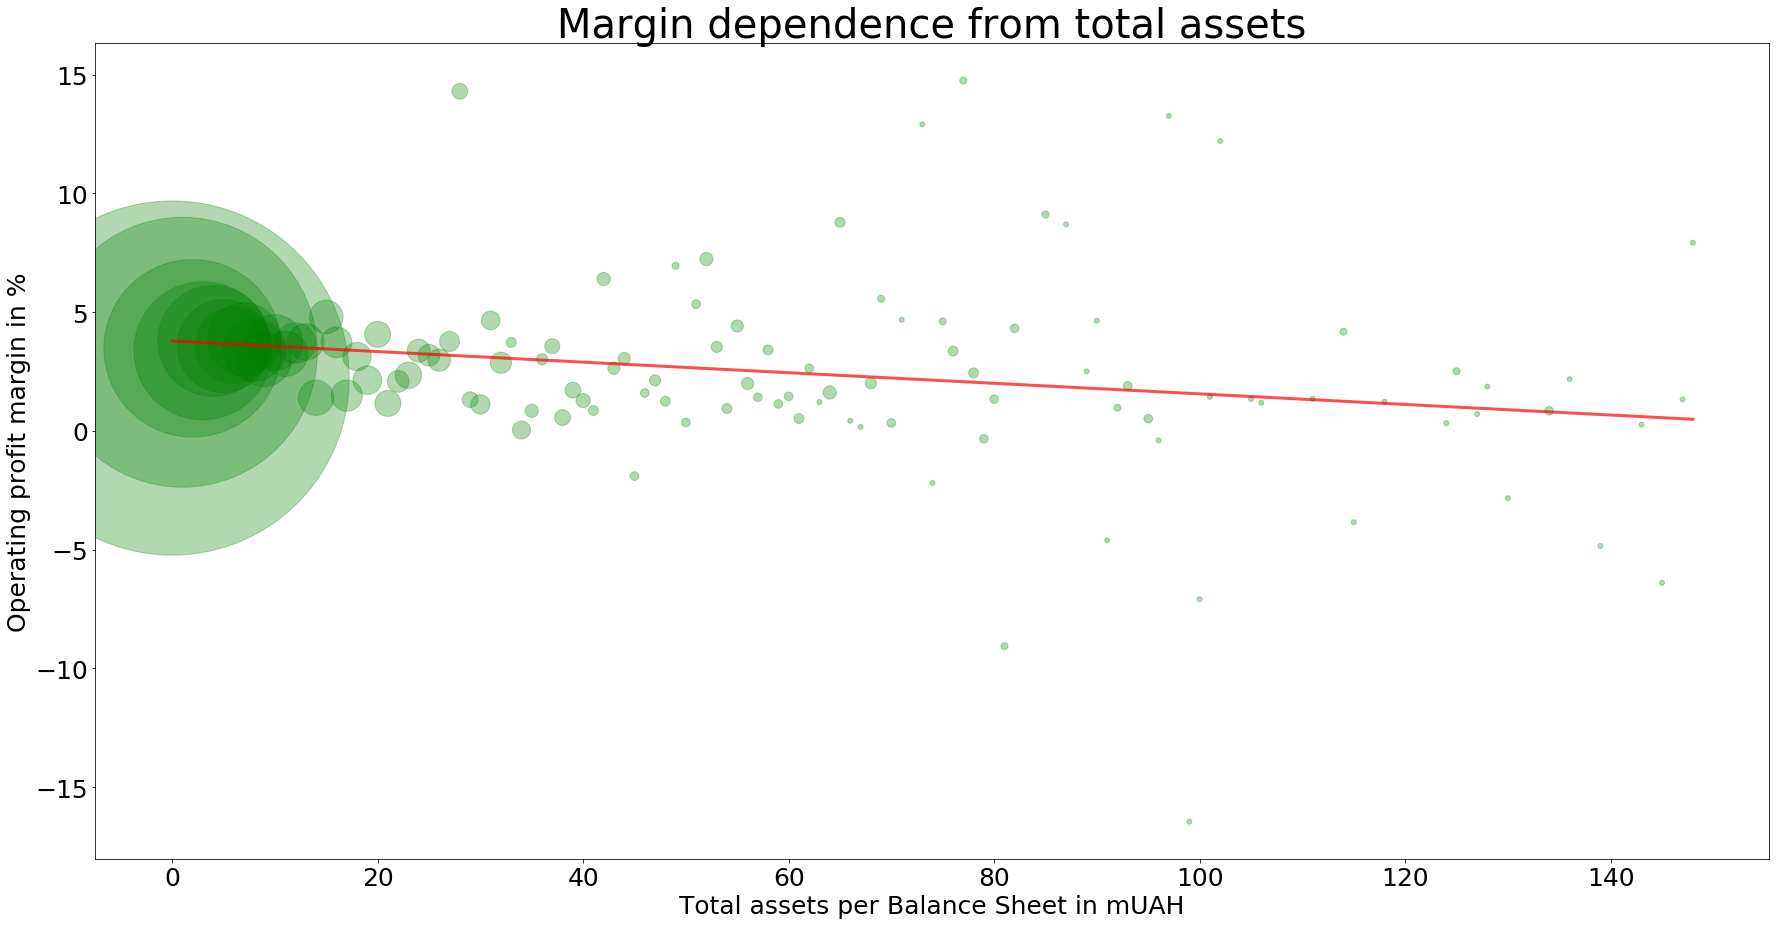

In [436]:
ln, ax = plt.subplots(figsize=(30,15))
ax.scatter(fd_bs_g.bs_ave, fd_bs_g.opm, s=fd_bs_g.quantity*25, c='g', alpha = 0.3)
#ax.scatter(fd_bs_g.bs_ave, fd_bs_g.opm, s=400, c='g', alpha = 0.3)
ax.plot(bs_train, pred_bs, color = 'r', linewidth=3, alpha=0.7)
ax.set_xlabel('Total assets per Balance Sheet in mUAH')
ax.set_ylabel('Operating profit margin in %')
ax.set_title('Margin dependence from total assets')
ax.title.set_fontsize(40)
#ax.grid()
#ax.set_xlim(right = 70)
#ax.set_ylim(bottom = -3, top = 10)
for item in ([ax.xaxis.label, ax.yaxis.label]+ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)
plt.show()